# Causal relationships

_Author: Christoph Rahmede_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import networkx as nx

In many cases, we can experience order reversal if looking either at the aggregated or segmented groups. Depending on the causal relationship, we may have to look at the one or the other.

## Conditioning on $Z$ required

This is the situation we have in the drug experiment. The confounding variable $Z$ impacts both $X$ and $Y$, and we have to condition on $Z$.

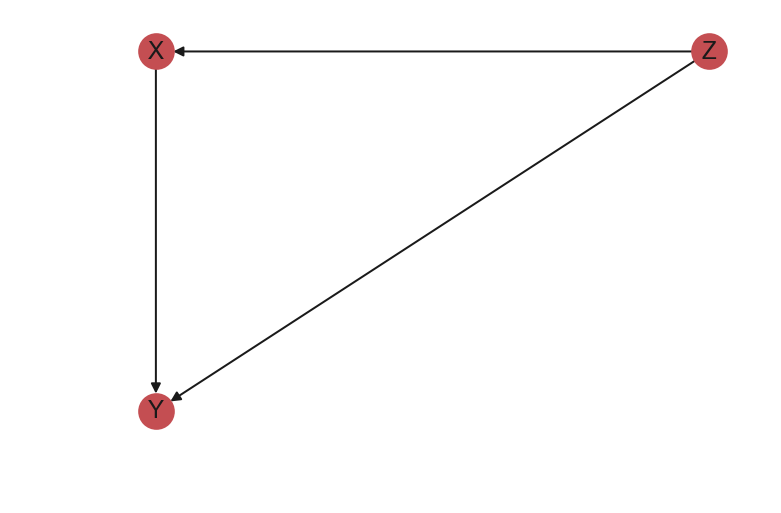

In [3]:
G = nx.DiGraph()
G.add_edges_from([['Z', 'X'], ['X', 'Y'], ['Z', 'Y']])

pos = {'Y': [0, 0], 'X': [0, 1], 'Z': [1, 1]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

We might have an additional variable which has an (indirect) impact on both $X$ and $Y$. In this case, we still have to condition on $Z$.

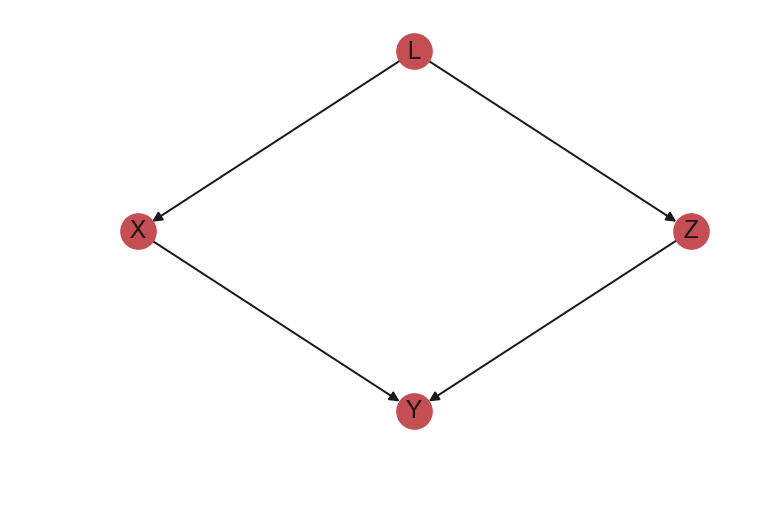

In [4]:
G = nx.DiGraph()
G.add_edges_from([['L', 'X'], ['L', 'Z'], ['X', 'Y'], ['Z', 'Y']])

pos = {'Y': [0.5, 0], 'X': [0, 1], 'Z': [1, 1], 'L': [0.5, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

## No conditioning on $Z$

Since $Z$ has no causal impact on $X$, we should not condition on $Z$.

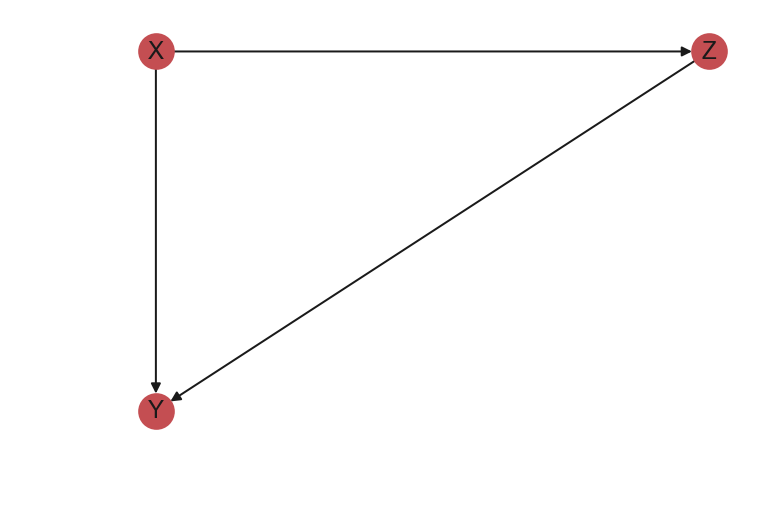

In [5]:
G = nx.DiGraph()
G.add_edges_from([['X', 'Z'], ['X', 'Y'], ['Z', 'Y']])

pos = {'Y': [0, 0], 'X': [0, 1], 'Z': [1, 1]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

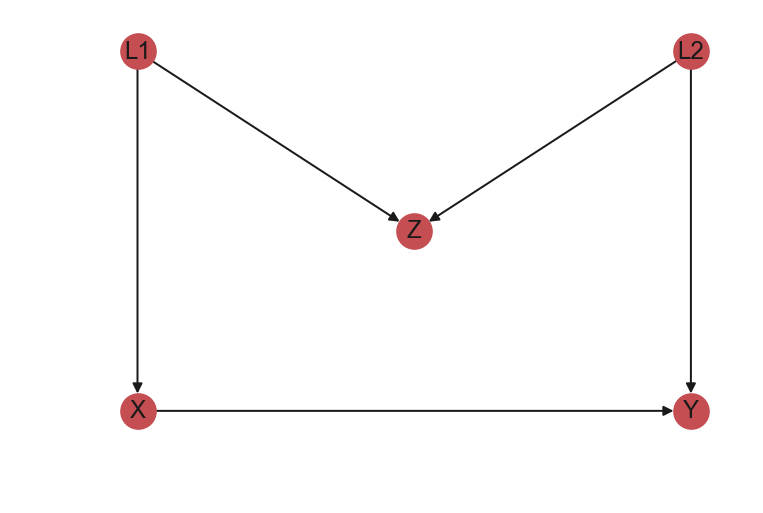

In [6]:
G = nx.DiGraph()
G.add_edges_from([['L1', 'X'], ['L1', 'Z'], [
                 'L2', 'Z'], ['X', 'Y'], ['L2', 'Y']])

pos = {'Y': [1, 0], 'X': [0, 0], 'Z': [0.5, 1], 'L1': [0, 2], 'L2': [1, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

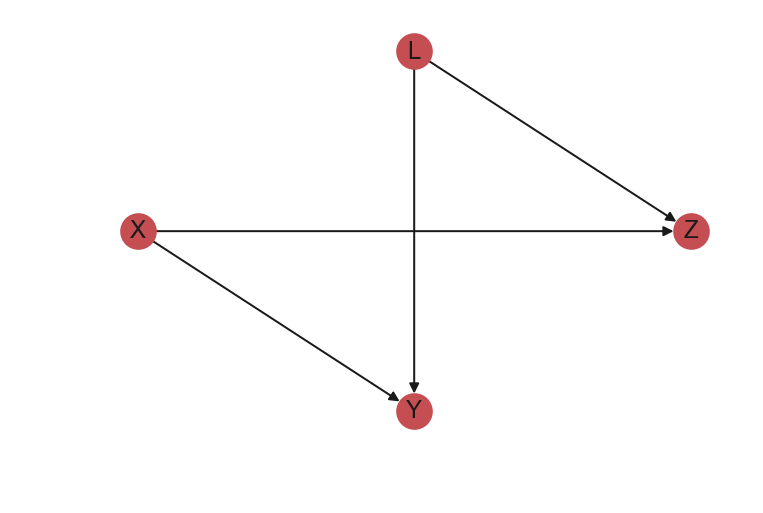

In [7]:
G = nx.DiGraph()
G.add_edges_from([['L', 'Y'], ['L', 'Z'], ['X', 'Y'], ['X', 'Z']])

pos = {'Y': [0.5, 0], 'X': [0, 1], 'Z': [1, 1], 'L': [0.5, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

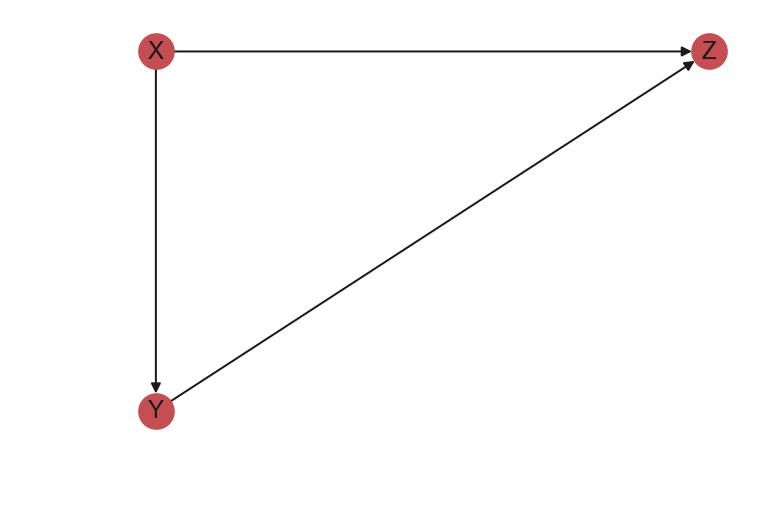

In [8]:
G = nx.DiGraph()
G.add_edges_from([['X', 'Z'], ['X', 'Y'], ['Y', 'Z']])

pos = {'Y': [0, 0], 'X': [0, 1], 'Z': [1, 1]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

In the following case, conditioning or not conditioning on $Z$ does not prevent confounding, rather the observation of an additional variable is required.

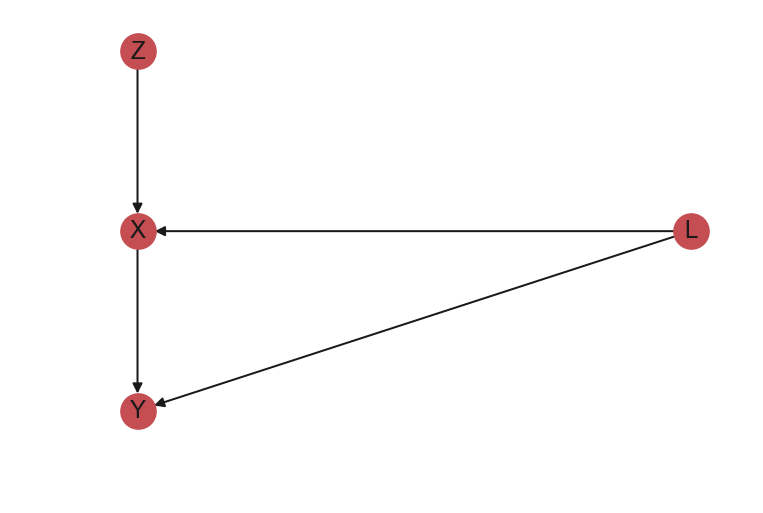

In [9]:
G = nx.DiGraph()
G.add_edges_from([['Z', 'X'], ['L', 'X'], ['X', 'Y'], ['L', 'Y']])

pos = {'Y': [0, 0], 'X': [0, 1], 'L': [1, 1], 'Z': [0, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

## No reversal possible

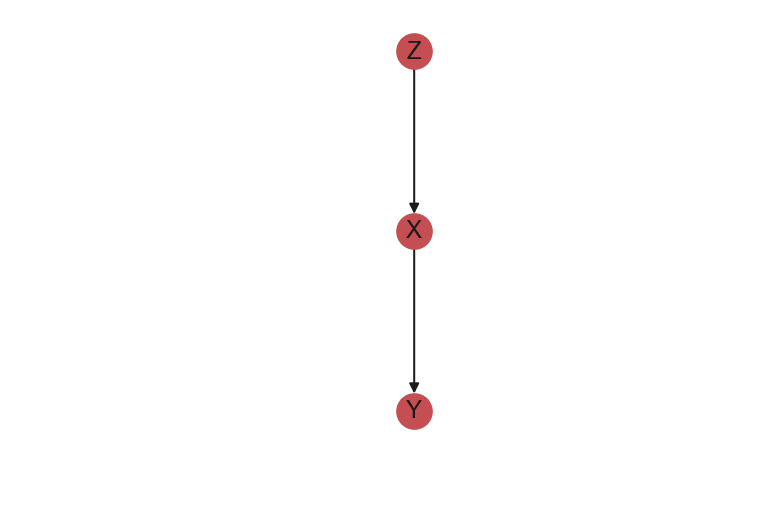

In [10]:
G = nx.DiGraph()
G.add_edges_from([['Z', 'X'], ['X', 'Y']])

pos = {'Y': [0, 0], 'X': [0, 1], 'Z': [0, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

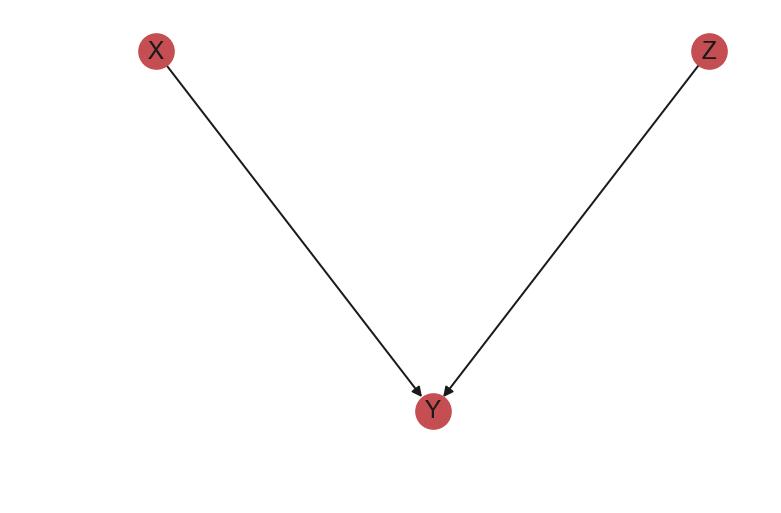

In [11]:
G = nx.DiGraph()
G.add_edges_from([['Z', 'Y'], ['X', 'Y']])

pos = {'Y': [0.5, 0], 'X': [0, 1], 'Z': [1, 1]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)

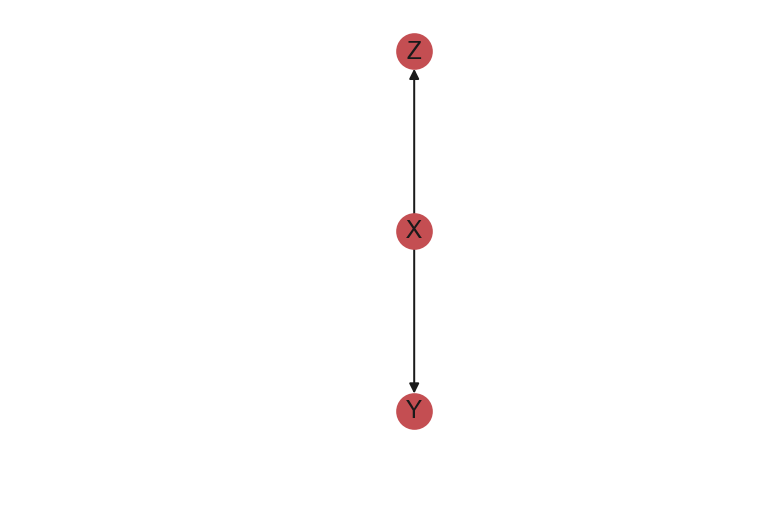

In [12]:
G = nx.DiGraph()
G.add_edges_from([['X', 'Z'], ['X', 'Y']])

pos = {'Y': [0, 0], 'X': [0, 1], 'Z': [0, 2]}
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, pos=pos, with_labels=True, ax=ax)